In [1]:
from segment_anything import build_sam, SamPredictor
sam_checkpoint = '../../models/sam/weights/sam_vit_h_4b8939.pth'
sam = build_sam(checkpoint=sam_checkpoint)
sam.to(device="cpu")
sam_predictor = SamPredictor(sam)

In [11]:
from groundingdino.util.inference import load_image
import numpy as np
from PIL import Image
IMAGE_PATH = "../assets/meow_and_woof.jpg"
image_source, image = load_image(IMAGE_PATH)

In [4]:
sam_predictor.set_image(image_source)

In [6]:
# transformed_boxes = sam_predictor.transform.apply_boxes_torch(boxes_xyxy, image_source.shape[:2]).to("cpu")
masks, _, _ = sam_predictor.predict_torch(
            point_coords = None,
            point_labels = None,
            boxes = None,
            multimask_output = False,
        )

In [7]:
def show_mask(mask, image, random_color=True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.8])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    
    annotated_frame_pil = Image.fromarray(image).convert("RGBA")
    mask_image_pil = Image.fromarray((mask_image.cpu().numpy() * 255).astype(np.uint8)).convert("RGBA")

    return np.array(Image.alpha_composite(annotated_frame_pil, mask_image_pil))

In [14]:
frame_with_mask = show_mask(masks[0][0], image_source)

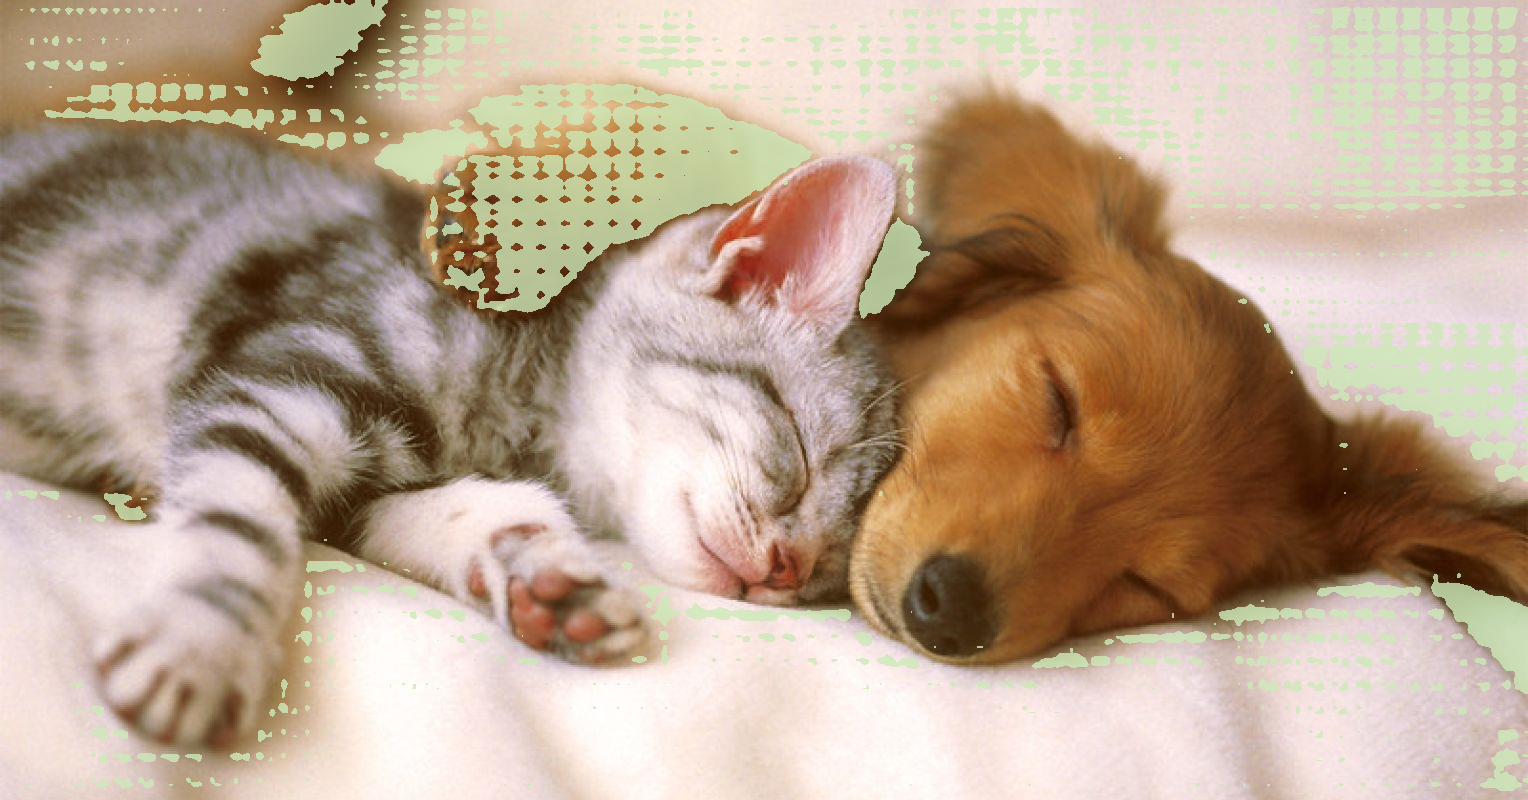

In [15]:
Image.fromarray(frame_with_mask)